In [1]:
import ROOT
import numpy as np
from array import array
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem

In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


/cvmfs/sphenix.sdcc.bnl.gov/alma9.2-gcc-14.2.0/opt/sphenix/core/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024/syst_covariance

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024/syst_covariance


In [4]:
direct = 'spring_2025/detdeta_run24_plots'

In [45]:
rgb = [[230, 25, 75], [60, 180, 75], [255, 225, 25], [0, 130, 200], [245, 130, 48], [145, 30, 180], [70, 240, 240], [240, 50, 230], [210, 245, 60], [250, 190, 212], [0, 128, 128], [220, 190, 255], [170, 110, 40], [128, 128, 128], [128, 0, 0], [0, 0, 0], [128, 128, 0], [255, 215, 180], [0, 0, 128], [34, 139, 34]]
colors = [TColor.GetColor(rgb[i][0],rgb[i][1],rgb[i][2]) for i in range(len(rgb))]

leg_name = ['MC rap. dep','Noise','Accept.','z-vertex','MC var. ampt','MC var. hijing','Had. Resp.','EMsyst1','EMsyst2','EMsyst3',
           'IHsyst1','IHsyst2','IHsyst3','OHsyst1','OHsyst2','OHsyst3']

paxis = [45,40,30,20,15,10,7]
naxis = [-45,-40,-30,-20,-15,-10,-7]

h_emcal_dev = []
h_hcal_dev = []
h_calo_dev = []
h_pos_emcal_dev = []
h_neg_emcal_dev = []
h_pos_hcal_dev = []
h_neg_hcal_dev = []
h_pos_calo_dev = []
h_neg_calo_dev = []
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
files = ['dETdeta_signed_variation_MC_rap_dep.root',
         'dETdeta_signed_variation_zs_60_30_30ADC.root',
         'dETdeta_signed_variation_run_by_run.root',
         'dETdeta_signed_variation_vz_-3cm.root',
         'dETdeta_signed_variation_MC.root',
         'dETdeta_signed_variation_had_resp.root',
         'dETdeta_signed_variation_1_emsyst1.root',
         'dETdeta_signed_variation_2_emsyst2.root',
         'dETdeta_signed_variation_3_emsyst3.root',
         'dETdeta_signed_variation_1_ihsyst1.root',
         'dETdeta_signed_variation_2_ihsyst2.root',
         'dETdeta_signed_variation_3_ihsyst3.root',
         'dETdeta_signed_variation_1_ohsyst1.root',
         'dETdeta_signed_variation_2_ohsyst2.root',
         'dETdeta_signed_variation_3_ohsyst3.root']
for i, file in enumerate(files):
    f1 = ROOT.TFile.Open(file)
    if i != 4:
        h_emcal_dev.append(TH1F(f1.Get("emcal_detdeta_dev")))
        h_hcal_dev.append(TH1F(f1.Get("hcal_detdeta_dev")))
        h_calo_dev.append(TH1F(f1.Get("calo_detdeta_dev")))
        h_emcal_dev[-1].SetDirectory(0)
        h_hcal_dev[-1].SetDirectory(0)
        h_calo_dev[-1].SetDirectory(0)
        h_pos_emcal_dev.append(TH2F(f1.Get("pos_eta_emcal_detdeta_dev")))
        h_neg_emcal_dev.append(TH2F(f1.Get("neg_eta_emcal_detdeta_dev")))
        h_pos_emcal_dev[-1].SetDirectory(0)
        h_neg_emcal_dev[-1].SetDirectory(0)
        h_pos_hcal_dev.append(TH2F(f1.Get("pos_eta_hcal_detdeta_dev")))
        h_neg_hcal_dev.append(TH2F(f1.Get("neg_eta_hcal_detdeta_dev")))
        h_pos_hcal_dev[-1].SetDirectory(0)
        h_neg_hcal_dev[-1].SetDirectory(0)
        h_pos_calo_dev.append(TH2F(f1.Get("pos_eta_calo_detdeta_dev")))
        h_neg_calo_dev.append(TH2F(f1.Get("neg_eta_calo_detdeta_dev")))
        h_pos_calo_dev[-1].SetDirectory(0)
        h_neg_calo_dev[-1].SetDirectory(0)
    else:
        h_emcal_dev.append(TH1F(f1.Get("emcal_detdeta_dev2")))
        h_emcal_dev.append(TH1F(f1.Get("emcal_detdeta_dev3")))
        h_hcal_dev.append(TH1F(f1.Get("hcal_detdeta_dev2")))
        h_hcal_dev.append(TH1F(f1.Get("hcal_detdeta_dev3")))
        h_calo_dev.append(TH1F(f1.Get("calo_detdeta_dev2")))
        h_calo_dev.append(TH1F(f1.Get("calo_detdeta_dev3")))
        h_emcal_dev[i].SetDirectory(0)
        h_emcal_dev[i+1].SetDirectory(0)
        h_hcal_dev[i].SetDirectory(0)
        h_hcal_dev[i+1].SetDirectory(0)
        h_calo_dev[i].SetDirectory(0)
        h_calo_dev[i+1].SetDirectory(0)
        h_pos_emcal_dev.append(TH2F(f1.Get("pos_eta_emcal_detdeta_dev2")))
        h_neg_emcal_dev.append(TH2F(f1.Get("neg_eta_emcal_detdeta_dev2")))
        h_pos_hcal_dev.append(TH2F(f1.Get("pos_eta_hcal_detdeta_dev2")))
        h_neg_hcal_dev.append(TH2F(f1.Get("neg_eta_hcal_detdeta_dev2")))
        h_pos_calo_dev.append(TH2F(f1.Get("pos_eta_calo_detdeta_dev2")))
        h_neg_calo_dev.append(TH2F(f1.Get("neg_eta_calo_detdeta_dev2")))
        h_pos_emcal_dev.append(TH2F(f1.Get("pos_eta_emcal_detdeta_dev3")))
        h_neg_emcal_dev.append(TH2F(f1.Get("neg_eta_emcal_detdeta_dev3")))
        h_pos_hcal_dev.append(TH2F(f1.Get("pos_eta_hcal_detdeta_dev3")))
        h_neg_hcal_dev.append(TH2F(f1.Get("neg_eta_hcal_detdeta_dev3")))
        h_pos_calo_dev.append(TH2F(f1.Get("pos_eta_calo_detdeta_dev3")))
        h_neg_calo_dev.append(TH2F(f1.Get("neg_eta_calo_detdeta_dev3")))
        h_pos_emcal_dev[i].SetDirectory(0)
        h_neg_emcal_dev[i].SetDirectory(0)
        h_pos_hcal_dev[i].SetDirectory(0)
        h_neg_hcal_dev[i].SetDirectory(0)
        h_pos_calo_dev[i].SetDirectory(0)
        h_neg_calo_dev[i].SetDirectory(0)
        h_pos_emcal_dev[i+1].SetDirectory(0)
        h_neg_emcal_dev[i+1].SetDirectory(0)
        h_pos_hcal_dev[i+1].SetDirectory(0)
        h_neg_hcal_dev[i+1].SetDirectory(0)
        h_pos_calo_dev[i+1].SetDirectory(0)
        h_neg_calo_dev[i+1].SetDirectory(0)

In [46]:
emcal_dev = []
hcal_dev = []
calo_dev = []
pos_emcal_dev1 = []
neg_emcal_dev1 = []
pos_hcal_dev1 = []
neg_hcal_dev1 = []
pos_calo_dev1 = []
neg_calo_dev1 = []
pos_emcal_dev2 = []
neg_emcal_dev2 = []
pos_hcal_dev2 = []
neg_hcal_dev2 = []
pos_calo_dev2 = []
neg_calo_dev2 = []
pos_emcal_dev3 = []
neg_emcal_dev3 = []
pos_hcal_dev3 = []
neg_hcal_dev3 = []
pos_calo_dev3 = []
neg_calo_dev3 = []

for i in range(7):
    e, h, c, pe1, ne1, ph1, nh1, pc1, nc1, pe2, ne2 = [], [], [], [], [], [], [], [], [], [], []
    ph2, nh2, pc2, nc2, pe3, ne3, ph3, nh3, pc3, nc3 = [], [], [], [], [], [], [], [], [], []
    for hist in range(len(h_emcal_dev)):
        e.append(h_emcal_dev[hist].GetBinContent(i+1))
        h.append(h_hcal_dev[hist].GetBinContent(i+1))
        c.append(h_calo_dev[hist].GetBinContent(i+1))
        if hist < 10:
            pe1.append(h_pos_emcal_dev[hist].GetBinContent(1,i+1))
            ne1.append(h_neg_emcal_dev[hist].GetBinContent(1,i+1))
            pe2.append(h_pos_emcal_dev[hist].GetBinContent(2,i+1))
            ne2.append(h_neg_emcal_dev[hist].GetBinContent(2,i+1))
            pe3.append(h_pos_emcal_dev[hist].GetBinContent(3,i+1))
            ne3.append(h_neg_emcal_dev[hist].GetBinContent(3,i+1))
        if hist < 7 or hist > 9:
            ph1.append(h_pos_hcal_dev[hist].GetBinContent(1,i+1))
            nh1.append(h_neg_hcal_dev[hist].GetBinContent(1,i+1))
            ph2.append(h_pos_hcal_dev[hist].GetBinContent(2,i+1))
            nh2.append(h_neg_hcal_dev[hist].GetBinContent(2,i+1))
            ph3.append(h_pos_hcal_dev[hist].GetBinContent(3,i+1))
            nh3.append(h_neg_hcal_dev[hist].GetBinContent(3,i+1))
        pc1.append(h_pos_calo_dev[hist].GetBinContent(1,i+1))
        nc1.append(h_neg_calo_dev[hist].GetBinContent(1,i+1))
        pc2.append(h_pos_calo_dev[hist].GetBinContent(2,i+1))
        nc2.append(h_neg_calo_dev[hist].GetBinContent(2,i+1))
        pc3.append(h_pos_calo_dev[hist].GetBinContent(3,i+1))
        nc3.append(h_neg_calo_dev[hist].GetBinContent(3,i+1))
    emcal_dev.append(e)
    hcal_dev.append(h)
    calo_dev.append(c)
    pos_emcal_dev1.append(pe1)
    neg_emcal_dev1.append(ne1)
    pos_hcal_dev1.append(ph1)
    neg_hcal_dev1.append(nh1)
    pos_calo_dev1.append(pc1)
    neg_calo_dev1.append(nc1)
    pos_emcal_dev2.append(pe2)
    neg_emcal_dev2.append(ne2)
    pos_hcal_dev2.append(ph2)
    neg_hcal_dev2.append(nh2)
    pos_calo_dev2.append(pc2)
    neg_calo_dev2.append(nc2)
    pos_emcal_dev3.append(pe3)
    neg_emcal_dev3.append(ne3)
    pos_hcal_dev3.append(ph3)
    neg_hcal_dev3.append(nh3)
    pos_calo_dev3.append(pc3)
    neg_calo_dev3.append(nc3)

In [47]:
print(len(neg_hcal_dev1[0]))

13


In [48]:
print("Pearson Correlation Values")
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(10, array('d', pos_emcal_dev1[i]), array('d', neg_emcal_dev1[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"{correlation:.4f}",end=", ")
print()
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(10, array('d', pos_emcal_dev2[i]), array('d', neg_emcal_dev2[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"{correlation:.4f}",end=", ")
print()
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(10, array('d', pos_emcal_dev3[i]), array('d', neg_emcal_dev3[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"{correlation:.4f}",end=", ")
print()

Pearson Correlation Values
0.9196, 0.9419, 0.9521, 0.9402, 0.9586, 0.9208, 0.9755, 
0.9791, 0.9833, 0.9812, 0.9794, 0.9804, 0.8394, 0.9852, 
0.9911, 0.9947, 0.9961, 0.9965, 0.9975, 0.8690, 0.9601, 


In [49]:
print("Pearson Correlation Values")
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(13, array('d', pos_hcal_dev1[i]), array('d', neg_hcal_dev1[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"{correlation:.4f}",end=", ")
print()
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(13, array('d', pos_hcal_dev2[i]), array('d', neg_hcal_dev2[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"{correlation:.4f}",end=", ")
print()
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(13, array('d', pos_hcal_dev3[i]), array('d', neg_hcal_dev3[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"{correlation:.4f}",end=", ")
print()

Pearson Correlation Values
0.8408, 0.8411, 0.8343, 0.8673, 0.8607, 0.5402, 0.9454, 
0.9621, 0.9713, 0.9671, 0.9650, 0.9587, 0.5028, 0.9568, 
0.9932, 0.9921, 0.9892, 0.9900, 0.9851, 0.4655, 0.9135, 


In [50]:
print("Pearson Correlation Values")
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(16, array('d', pos_calo_dev1[i]), array('d', neg_calo_dev1[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"{correlation:.4f}",end=", ")
print()
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(16, array('d', pos_calo_dev2[i]), array('d', neg_calo_dev2[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"{correlation:.4f}",end=", ")
print()
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(16, array('d', pos_calo_dev3[i]), array('d', neg_calo_dev3[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"{correlation:.4f}",end=", ")
print()

Pearson Correlation Values
0.8484, 0.8723, 0.8948, 0.8924, 0.9146, 0.7243, 0.9624, 
0.9742, 0.9812, 0.9807, 0.9773, 0.9764, 0.6318, 0.9759, 
0.9896, 0.9924, 0.9938, 0.9943, 0.9938, 0.6403, 0.9483, 


In [51]:
for i in range(7):
    # Convert lists to TGraph
    graph = ROOT.TGraph(16, array('d', emcal_dev[i]), array('d', hcal_dev[i]))

    # Compute Pearson correlation coefficient
    correlation = graph.GetCorrelationFactor()

    print(f"Dataset {i+1}: Pearson Correlation = {correlation:.4f}")

Dataset 1: Pearson Correlation = 0.7769
Dataset 2: Pearson Correlation = 0.7680
Dataset 3: Pearson Correlation = 0.7545
Dataset 4: Pearson Correlation = 0.7332
Dataset 5: Pearson Correlation = 0.7021
Dataset 6: Pearson Correlation = 0.6456
Dataset 7: Pearson Correlation = 0.5854


Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <T

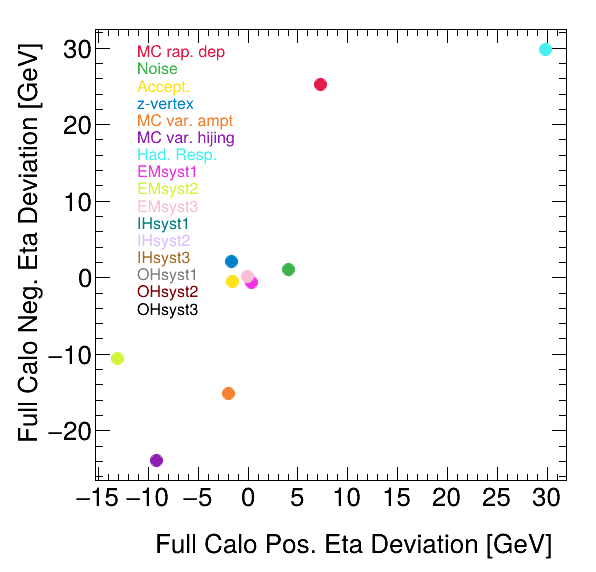

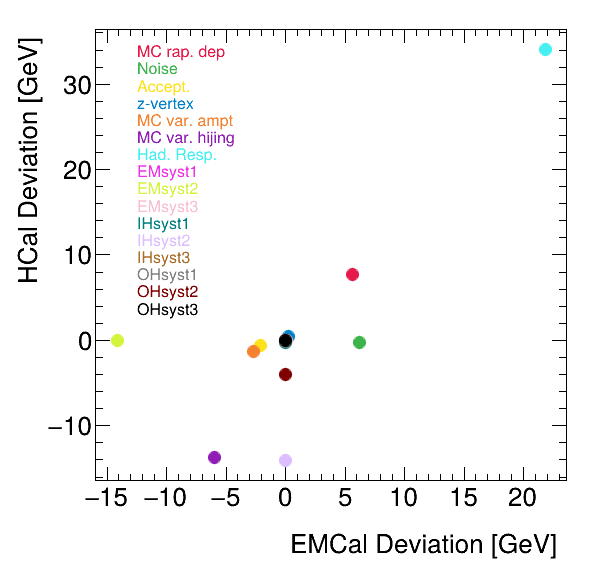

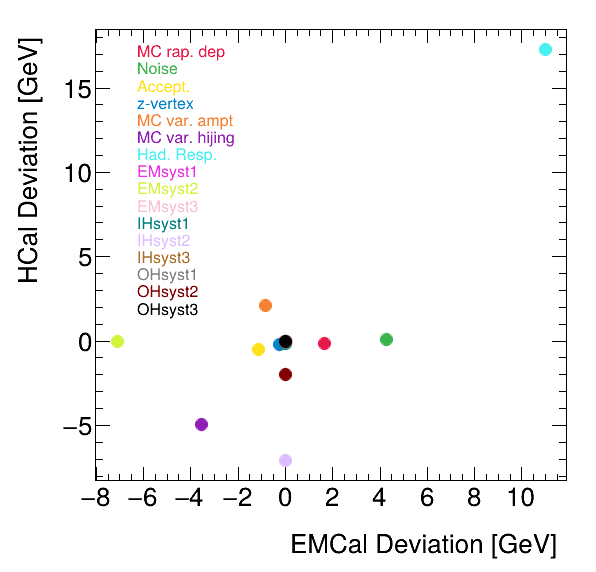

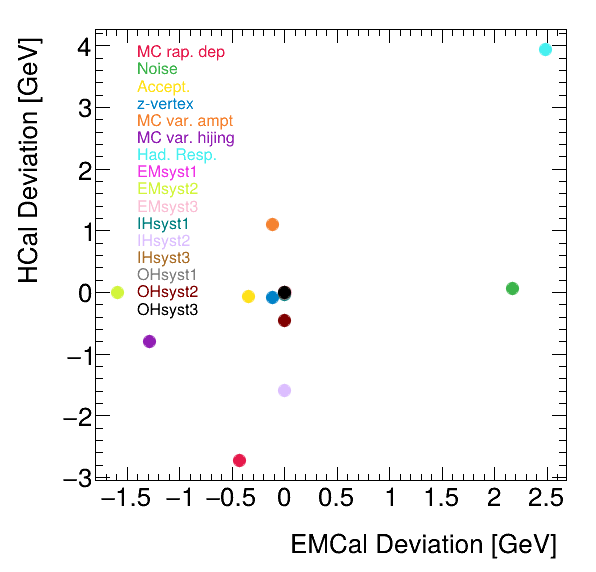

In [52]:
canvases = []
graphs = []

for i in range(7):
    c = ROOT.TCanvas(f"cf{i}", f"Scatter Plot {i+1}", 600, 600)

    # Create a TMultiGraph to hold multiple colored points
    mg = ROOT.TMultiGraph()

    # Create individual TGraphs for each point index
    for j in range(16):  # 4 points per set
        graph = ROOT.TGraph(1)  # One point per graph
        graph.SetPoint(0, emcal_dev[i][j], hcal_dev[i][j])  # (x, y)
        graph.GetXaxis().SetRangeUser(naxis[i],paxis[i])
        graph.GetYaxis().SetRangeUser(naxis[i],paxis[i])

        # Set color and marker style for each point
        graph.SetMarkerStyle(20)  # Circle marker
        graph.SetMarkerSize(1.5)
        graph.SetMarkerColor(colors[j])

        mg.Add(graph)  # Add graph to MultiGraph

    # Set the title and axis labels
    mg.SetTitle(f"EMCal vs HCal Deviation {i+1};EMCal Deviation [GeV];HCal Deviation [GeV]")

    # Draw scatter plot
    mg.Draw("AP")  # "A" = axis, "P" = points

    for j in range(len(leg_name)):
        t = ROOT.TText()
        t.SetTextSize(0.03)
        t.SetNDC(True)
        t.SetTextColor(colors[j])
        t.DrawText(0.23,0.9-0.03*j,leg_name[j])

    # Save references
    canvases.append(c)
    graphs.append(mg)

    # Update canvas
    c.Update()
    c.Draw()
    c.SaveAs(f'/sphenix/u/egm2153/'+direct+'/covariance_'+cents[i]+'.png')

Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <T

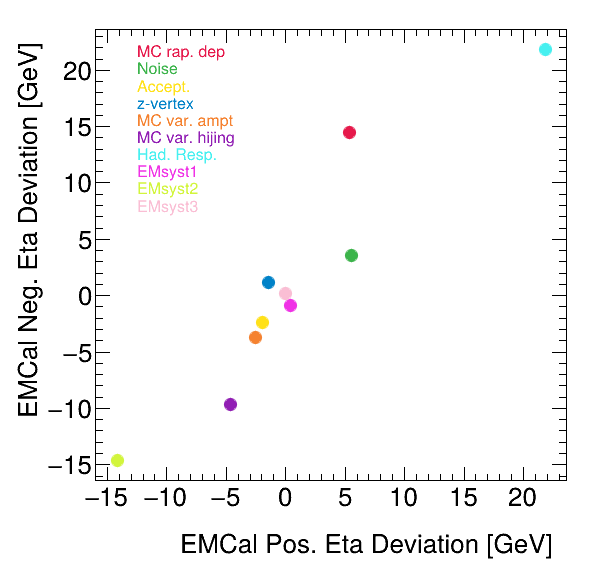

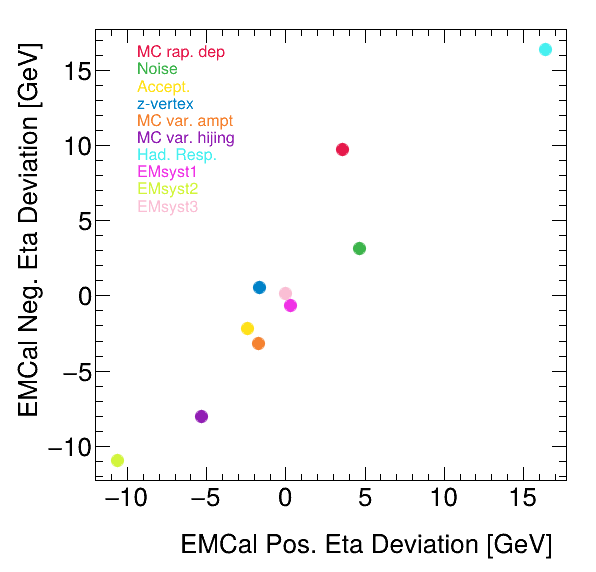

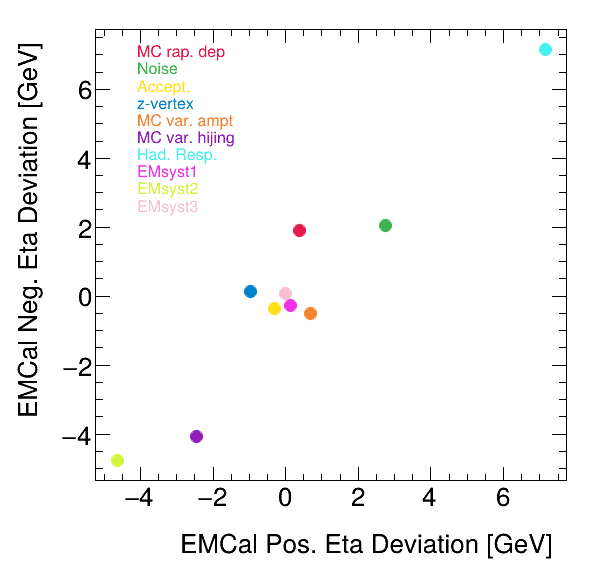

In [53]:
canvases = []
graphs = []

for i in range(7):
    c = ROOT.TCanvas(f"cf{i}", f"Scatter Plot {i+1}", 600, 600)

    # Create a TMultiGraph to hold multiple colored points
    mg = ROOT.TMultiGraph()

    # Create individual TGraphs for each point index
    for j in range(10):  # 4 points per set
        graph = ROOT.TGraph(1)  # One point per graph
        graph.SetPoint(0, pos_emcal_dev1[i][j], neg_emcal_dev1[i][j])  # (x, y)
        graph.GetXaxis().SetRangeUser(naxis[i],paxis[i])
        graph.GetYaxis().SetRangeUser(naxis[i],paxis[i])

        # Set color and marker style for each point
        graph.SetMarkerStyle(20)  # Circle marker
        graph.SetMarkerSize(1.5)
        graph.SetMarkerColor(colors[j])

        mg.Add(graph)  # Add graph to MultiGraph

    # Set the title and axis labels
    mg.SetTitle(f"EMCal Pos. Eta vs EMCal Neg. Eta Deviation {i+1};EMCal Pos. Eta Deviation [GeV];EMCal Neg. Eta Deviation [GeV]")
    
    # Draw scatter plot
    mg.Draw("AP")  # "A" = axis, "P" = points

    for j in range(len(leg_name)):
        if j < 10:
            t = ROOT.TText()
            t.SetTextSize(0.03)
            t.SetNDC(True)
            t.SetTextColor(colors[j])
            t.DrawText(0.23,0.9-0.03*j,leg_name[j])

    # Save references
    canvases.append(c)
    graphs.append(mg)

    # Update canvas
    c.Update()
    c.Draw()
    c.SaveAs(f'/sphenix/u/egm2153/'+direct+'/emcal_pos_neg_eta_covariance_'+cents[i]+'.png')

Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <T

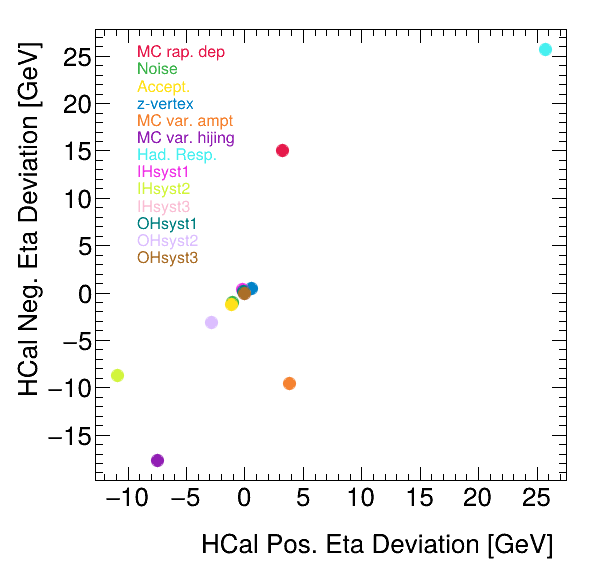

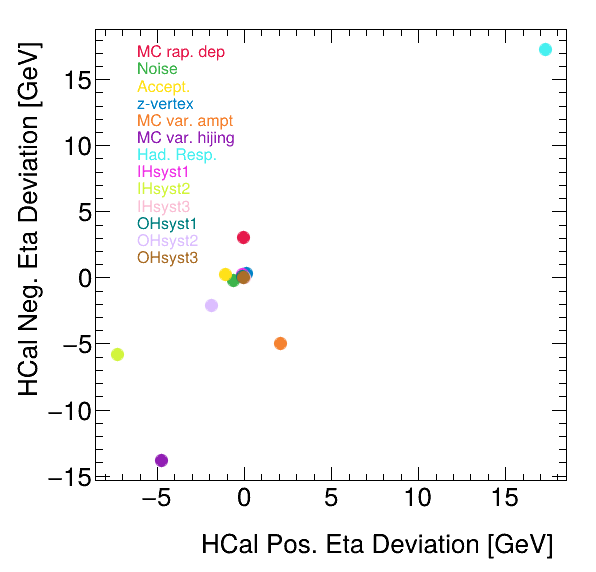

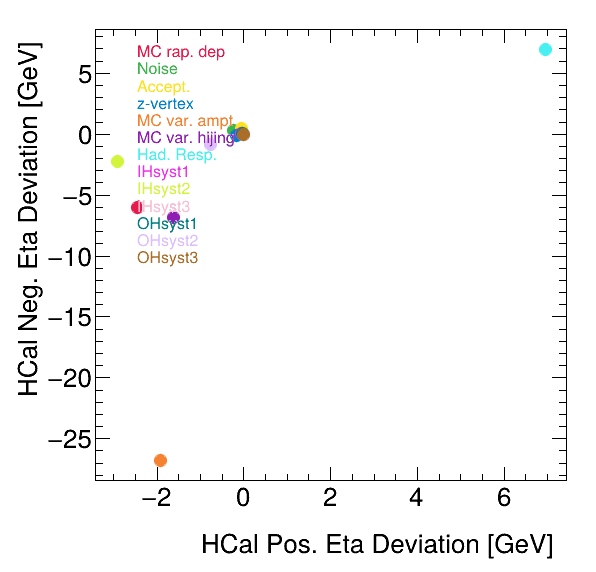

In [54]:
canvases = []
graphs = []

for i in range(7):
    c = ROOT.TCanvas(f"cf{i}", f"Scatter Plot {i+1}", 600, 600)

    # Create a TMultiGraph to hold multiple colored points
    mg = ROOT.TMultiGraph()

    # Create individual TGraphs for each point index
    for j in range(13):  # 4 points per set
        graph = ROOT.TGraph(1)  # One point per graph
        graph.SetPoint(0, pos_hcal_dev1[i][j], neg_hcal_dev1[i][j])  # (x, y)

        # Set color and marker style for each point
        graph.SetMarkerStyle(20)  # Circle marker
        graph.SetMarkerSize(1.5)
        graph.SetMarkerColor(colors[j])
        graph.GetXaxis().SetRangeUser(naxis[i],paxis[i])
        graph.GetYaxis().SetRangeUser(naxis[i],paxis[i])

        mg.Add(graph)  # Add graph to MultiGraph

    # Set the title and axis labels
    mg.SetTitle(f"HCal Pos. Eta vs HCal Neg. Eta Deviation {i+1};HCal Pos. Eta Deviation [GeV];HCal Neg. Eta Deviation [GeV]")

    # Draw scatter plot
    mg.Draw("AP")  # "A" = axis, "P" = points

    # Save references
    canvases.append(c)
    graphs.append(mg)

    for j in range(len(leg_name)):
        t = ROOT.TText()
        t.SetTextSize(0.03)
        t.SetNDC(True)
        if j < 7:
            t.SetTextColor(colors[j])
            t.DrawText(0.23,0.9-0.03*j,leg_name[j])
        elif j >= 10:
            t.SetTextColor(colors[j-3])
            t.DrawText(0.23,0.9-0.03*(j-3),leg_name[j])

    # Update canvas
    c.Update()
    c.Draw()
    c.SaveAs(f'/sphenix/u/egm2153/'+direct+'/hcal_pos_neg_eta_covariance_'+cents[i]+'.png')

Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <T

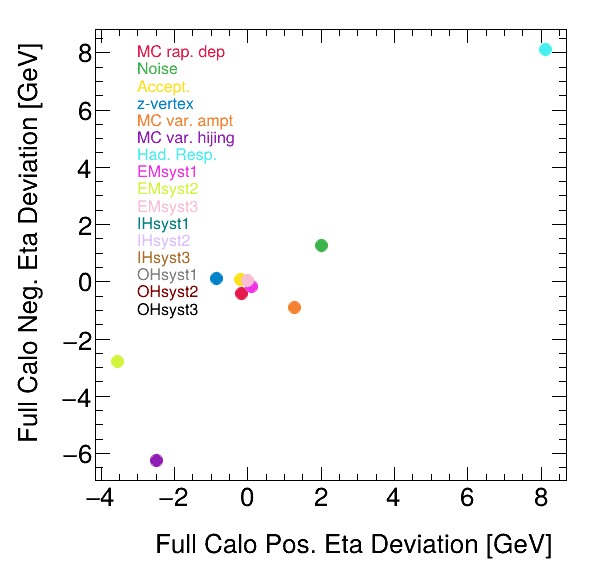

In [55]:
canvases = []
graphs = []

for i in range(7):
    c = ROOT.TCanvas(f"cf{i}", f"Scatter Plot {i+1}", 600, 600)

    # Create a TMultiGraph to hold multiple colored points
    mg = ROOT.TMultiGraph()

    # Create individual TGraphs for each point index
    for j in range(10):  # 4 points per set
        graph = ROOT.TGraph(1)  # One point per graph
        graph.SetPoint(0, pos_calo_dev1[i][j], neg_calo_dev1[i][j])  # (x, y)

        # Set color and marker style for each point
        graph.SetMarkerStyle(20)  # Circle marker
        graph.SetMarkerSize(1.5)
        graph.SetMarkerColor(colors[j])
        graph.GetYaxis().SetRangeUser(naxis[i],paxis[i])
        graph.GetXaxis().SetRangeUser(naxis[i],paxis[i])

        mg.Add(graph)  # Add graph to MultiGraph

    # Set the title and axis labels
    mg.SetTitle(f"Full Calo Pos. Eta vs Full Calo Neg. Eta Deviation {i+1};Full Calo Pos. Eta Deviation [GeV];Full Calo Neg. Eta Deviation [GeV]")

    # Draw scatter plot
    mg.Draw("AP")  # "A" = axis, "P" = points

    # Save references
    canvases.append(c)
    graphs.append(mg)

    for j in range(len(leg_name)):
        t = ROOT.TText()
        t.SetTextSize(0.03)
        t.SetNDC(True)
        t.SetTextColor(colors[j])
        t.DrawText(0.23,0.9-0.03*j,leg_name[j])

    # Update canvas
    c.Update()
    c.Draw()
    c.SaveAs(f'/sphenix/u/egm2153/'+direct+'/calo_pos_neg_eta_covariance_'+cents[i]+'.png')